In [1]:
import numpy as np
import random

# 부모 배열 정의 (이전과 동일)
parent1 = np.array([
    [ 1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  4,  4,  4,  4,  4],
    [ 1,  1,  2,  2,  2,  2,  2,  6,  2,  2,  2,  4,  4,  4,  4,  4],
    [ 1,  1,  1,  1,  1,  1,  1,  6,  2,  2,  2,  4,  4,  4,  4,  4],
    [ 1,  1,  1,  1,  1,  1,  1,  1,  3,  3,  3,  3,  3,  4,  4,  4],
    [ 1,  1,  1,  1,  1,  1,  1,  1,  3,  3,  3,  3,  3,  3,  3,  3],
    [ 1,  1,  1,  1,  1,  7,  7,  5,  5,  3,  3,  3,  3,  3,  3,  3],
    [ 1,  1,  1,  1,  1,  7,  7,  5,  5,  8,  8,  8, -1, -1, -1, -1],
    [ 1,  1,  1,  1,  1,  7,  7,  5,  5,  8,  8,  8, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1,  5,  5,  5,  5, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1,  5,  5,  5,  5, -1, -1, -1, -1, -1, -1]
])

parent2 = np.array([
    [ 8,  8,  8,  8,  7,  7,  7,  1,  1,  1,  1,  1,  6,  6,  2,  2],
    [ 8,  8,  8,  8,  7,  7,  7,  1,  1,  1,  1,  1,  6,  6,  2,  2],
    [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  1,  1,  1,  6,  6,  6,  6],
    [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  1,  1,  1,  6,  6,  6,  6],
    [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  1,  1,  1,  3,  3,  3,  3],
    [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  1,  1,  1,  3,  3,  3,  3],
    [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  1,  1,  1, -1, -1, -1, -1],
    [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  1,  1,  1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1,  4,  4,  4,  4, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1,  4,  4,  4,  4, -1, -1, -1, -1, -1, -1]
])

# 특정 방 하나를 parent1에서 선택, 나머지 방은 parent2에서 선택
def combine_floorplans(parent1, parent2, selected_room):
    combined = np.where(parent1 == selected_room, parent1, parent2)  # parent1에서 선택한 방을 유지, 나머지는 parent2에서
    return combined

# 빈 셀(0)을 인접한 셀의 방 번호로 채우기
def fill_empty_cells(floorplan):
    filled_floorplan = floorplan.copy()
    rows, cols = filled_floorplan.shape
    for i in range(rows):
        for j in range(cols):
            if filled_floorplan[i, j] == 0:  # 빈 셀인 경우
                neighbors = get_neighbors(filled_floorplan, i, j)
                if neighbors:
                    filled_floorplan[i, j] = random.choice(neighbors)  # 인접한 방 번호 중 하나로 채움
    return filled_floorplan

# 인접한 셀들의 방 번호를 가져오는 함수
def get_neighbors(floorplan, i, j):
    neighbors = []
    if i > 0 and floorplan[i-1, j] != 0:
        neighbors.append(floorplan[i-1, j])
    if i < floorplan.shape[0] - 1 and floorplan[i+1, j] != 0:
        neighbors.append(floorplan[i+1, j])
    if j > 0 and floorplan[i, j-1] != 0:
        neighbors.append(floorplan[i, j-1])
    if j < floorplan.shape[1] - 1 and floorplan[i, j+1] != 0:
        neighbors.append(floorplan[i, j+1])
    return neighbors

# 방 번호 3을 parent1에서 선택하고, 나머지는 parent2에서 선택하여 새로운 floorplan 생성
combined_floorplan = combine_floorplans(parent1, parent2, 3)

# 빈 셀을 인접 셀의 방 번호로 채움
final_floorplan = fill_empty_cells(combined_floorplan)
final_floorplan


array([[ 8,  8,  8,  8,  7,  7,  7,  1,  1,  1,  1,  1,  6,  6,  2,  2],
       [ 8,  8,  8,  8,  7,  7,  7,  1,  1,  1,  1,  1,  6,  6,  2,  2],
       [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  1,  1,  1,  6,  6,  6,  6],
       [ 5,  5,  5,  5,  4,  4,  4,  4,  3,  3,  3,  3,  3,  6,  6,  6],
       [ 5,  5,  5,  5,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  3,  3,  3,  3,  3,  3,  3],
       [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  1,  1,  1, -1, -1, -1, -1],
       [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  1,  1,  1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  4,  4,  4,  4, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  4,  4,  4,  4, -1, -1, -1, -1, -1, -1]])

In [9]:
import numpy as np
from scipy.ndimage import label

# 특정 좌표의 이웃 좌표를 찾는 함수 (개선된 버전)
def get_neighbors_coords(labeled_array, x, y, target_label):
    neighbors = []
    if x > 0 and labeled_array[x-1, y] == target_label:
        neighbors.append((x-1, y))
    if x < labeled_array.shape[0] - 1 and labeled_array[x+1, y] == target_label:
        neighbors.append((x+1, y))
    if y > 0 and labeled_array[x, y-1] == target_label:
        neighbors.append((x, y-1))
    if y < labeled_array.shape[1] - 1 and labeled_array[x, y+1] == target_label:
        neighbors.append((x, y+1))

    return neighbors

# 연결된 구성 요소를 식별하고 작은 덩어리를 큰 덩어리에 병합하는 함수
def merge_components(floorplan, room_number):
    # 방 번호가 room_number인 부분만 추출
    binary_floorplan = (floorplan == room_number).astype(int)

    # 연결된 구성 요소 식별
    labeled_array, num_features = label(binary_floorplan)
    
    if num_features <= 1:
        return floorplan  # 이미 하나의 덩어리로 되어 있으면 반환

    # 각 덩어리의 크기 계산
    component_sizes = [(labeled_array == i).sum() for i in range(1, num_features + 1)]
    
    # 가장 큰 덩어리의 레이블 찾기
    largest_component_label = component_sizes.index(max(component_sizes)) + 1

    # 가장 큰 덩어리를 유지하고, 나머지를 병합
    for i in range(1, num_features + 1):
        if i != largest_component_label:
            # 작은 덩어리의 좌표
            small_component_coords = np.argwhere(labeled_array == i)
            for (x, y) in small_component_coords:
                # 인접한 큰 덩어리의 셀로 병합
                neighbors = get_neighbors_coords(labeled_array, x, y, largest_component_label)
                if neighbors:
                    nearest_neighbor = neighbors[0]  # 가장 가까운 이웃을 선택
                    floorplan[x, y] = room_number

    # 남아 있는 빈 셀을 채우기 위해 재시도
    binary_floorplan = (floorplan == room_number).astype(int)
    labeled_array, num_features = label(binary_floorplan)
    if num_features > 1:
        floorplan = fill_remaining_empty_spaces(floorplan, labeled_array, largest_component_label, room_number)
    
    return floorplan

# 남은 빈 셀을 채우는 함수
def fill_remaining_empty_spaces(floorplan, labeled_array, largest_component_label, room_number):
    for i in range(labeled_array.shape[0]):
        for j in range(labeled_array.shape[1]):
            if labeled_array[i, j] != largest_component_label and labeled_array[i, j] > 0:
                neighbors = get_neighbors_coords(labeled_array, i, j, largest_component_label)
                if neighbors:
                    floorplan[i, j] = room_number
    return floorplan

# 덩어리를 병합한 결과를 확인
final_floorplan = merge_components(combined_floorplan, 1)
final_floorplan


KeyboardInterrupt: 

In [10]:
import numpy as np
from scipy.ndimage import label
from scipy.spatial import distance
from queue import Queue

# 두 덩어리 사이의 최단 경로를 찾아서 병합하는 함수
def find_shortest_path_and_merge(floorplan, room_number):
    binary_floorplan = (floorplan == room_number).astype(int)
    labeled_array, num_features = label(binary_floorplan)

    if num_features <= 1:
        return floorplan

    # 각 덩어리의 좌표들 가져오기
    component_coords = [np.argwhere(labeled_array == i) for i in range(1, num_features + 1)]

    # 가장 큰 덩어리 선택
    largest_component = max(component_coords, key=len)

    # 작은 덩어리들을 큰 덩어리에 병합
    for small_component in component_coords:
        if np.array_equal(small_component, largest_component):
            continue

        # 작은 덩어리와 큰 덩어리 사이의 최소 거리 계산
        shortest_dist = float('inf')
        closest_pair = None

        for small_coord in small_component:
            for large_coord in largest_component:
                dist = np.linalg.norm(small_coord - large_coord)
                if dist < shortest_dist:
                    shortest_dist = dist
                    closest_pair = (small_coord, large_coord)

        # 두 덩어리 사이의 경로 채우기
        if closest_pair:
            small_coord, large_coord = closest_pair
            path = draw_path(small_coord, large_coord)
            for (x, y) in path:
                floorplan[x, y] = room_number

    return floorplan

# 두 좌표 사이의 직선 경로를 그리는 함수
def draw_path(start, end):
    path = []
    x1, y1 = start
    x2, y2 = end
    while (x1, y1) != (x2, y2):
        if x1 < x2:
            x1 += 1
        elif x1 > x2:
            x1 -= 1
        if y1 < y2:
            y1 += 1
        elif y1 > y2:
            y1 -= 1
        path.append((x1, y1))
    return path

# 덩어리를 병합한 결과를 확인
final_floorplan = find_shortest_path_and_merge(combined_floorplan, 1)
final_floorplan


array([[ 8,  8,  8,  8,  7,  7,  7,  1,  1,  1,  1,  1,  6,  6,  2,  2],
       [ 8,  8,  8,  8,  7,  7,  7,  1,  1,  1,  1,  1,  6,  6,  2,  2],
       [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  1,  1,  1,  6,  6,  6,  6],
       [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  3,  3,  3,  3,  6,  6,  6],
       [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  3,  3,  3,  3,  3,  3,  3],
       [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  3,  3,  3,  3,  3,  3,  3],
       [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  1,  1,  1, -1, -1, -1, -1],
       [ 5,  5,  5,  5,  4,  4,  4,  4,  1,  1,  1,  1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  4,  4,  4,  4, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  4,  4,  4,  4, -1, -1, -1, -1, -1, -1]])

AttributeError: 'NoneType' object has no attribute 'get'

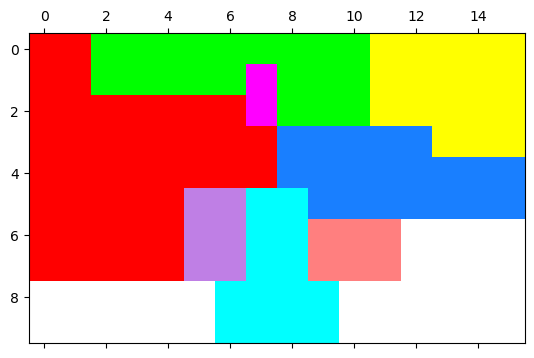

In [13]:
from GridDrawer import GridDrawer
GridDrawer.color_cells_by_value(parent1, './', 'parent1', True, True, 8)

AttributeError: 'NoneType' object has no attribute 'get'

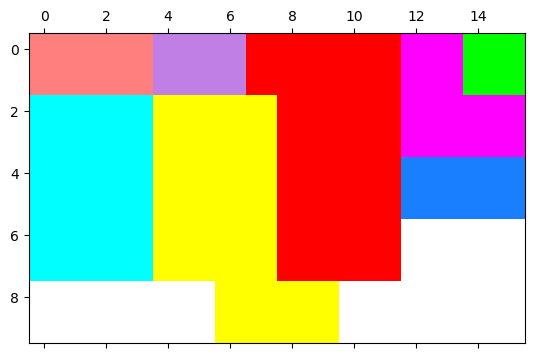

In [15]:
GridDrawer.color_cells_by_value(parent2, './', 'parent2', True, True, 8)

AttributeError: 'NoneType' object has no attribute 'get'

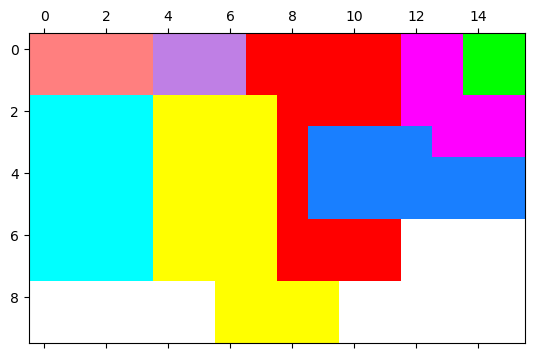

In [17]:
GridDrawer.color_cells_by_value(final_floorplan, './', 'final', True, True, 8)

In [23]:
from collections import Counter
r = []
for i in range(100): 
    r.append(random.randint(1, 8))
Counter(r)

Counter({9: 16, 3: 15, 7: 14, 4: 14, 2: 12, 5: 10, 8: 9, 1: 5, 6: 5})

In [24]:
import numpy as np
from scipy.ndimage import label

def uniform_crossover(self, parent1, parent2, num_rooms):
    """
    균등 교차를 통해 자식 플로어플랜을 생성합니다.
    """
    # 무작위 마스크 생성
    mask = np.random.randint(0, 2, size=parent1.shape)
    
    # 마스크를 사용하여 자식 생성
    child = np.where(mask == 1, parent1, parent2)
    
    # 각 방의 연결성 검사 및 복구
    for room_number in range(1, num_rooms + 1):
        child = self.ensure_room_connectivity(child, room_number)
    
    return child

def ensure_room_connectivity(self, floorplan, room_number):
    """
    특정 방의 연결성을 보장합니다.
    """
    binary_floorplan = (floorplan == room_number).astype(int)
    labeled_array, num_features = label(binary_floorplan)
    
    if num_features <= 1:
        return floorplan  # 이미 연결되어 있음
    
    # 가장 큰 연결된 구성요소 유지
    largest_component_label = np.argmax(np.bincount(labeled_array.flat)[1:]) + 1
    floorplan[labeled_array != largest_component_label] = 0  # 분리된 부분 제거
    
    # 제거된 부분을 인접 방으로 채우기
    floorplan = self.fill_removed_spaces(floorplan)
    
    return floorplan

def fill_removed_spaces(self, floorplan):
    """
    제거된 공간을 인접한 방으로 채웁니다.
    """
    rows, cols = floorplan.shape
    for i in range(rows):
        for j in range(cols):
            if floorplan[i, j] == 0:
                neighbors = self.get_adjacent_rooms(floorplan, i, j)
                if neighbors:
                    floorplan[i, j] = max(set(neighbors), key=neighbors.count)
    return floorplan

def get_adjacent_rooms(self, floorplan, x, y):
    """
    특정 좌표의 인접한 방 번호들을 반환합니다.
    """
    neighbors = []
    if x > 0:
        neighbors.append(floorplan[x-1, y])
    if x < floorplan.shape[0] - 1:
        neighbors.append(floorplan[x+1, y])
    if y > 0:
        neighbors.append(floorplan[x, y-1])
    if y < floorplan.shape[1] - 1:
        neighbors.append(floorplan[x, y+1])
    return [n for n in neighbors if n > 0]